In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as sp
from scipy.special import gamma,beta

#### Normal distribution ( also called Guassian distribution)
 
- Forms the base for many statistical tests
- Hence important to understand

In [3]:
# normal distribution

# Probability density function
def norm_pdf(x, mue, var):
    return sp.norm.pdf(x,mue,var)

#Cumulative density function
def norm_cdf(x, mue, var):
    return sp.norm.cdf(x,mue,var)

#Inverse of Cumulative density function
def norm_inv_cdf(x, mue, var):
    return sp.norm.ppf(x,mue,var)

We can use the scipy functions for ease.

Just for quick validation, writing the PDF function manually usually numpy

In [4]:
def norm_pdf_manual(x,mue,var):
    sigma = abs(np.sqrt(var))
    return np.exp((-1/2)*(((x-mue)/sigma)**2))/np.sqrt(2*math.pi)/sigma

In [5]:
norm_pdf_manual(1,0,1),norm_pdf(1, 0, 1)

(0.24197072451914337, 0.24197072451914337)

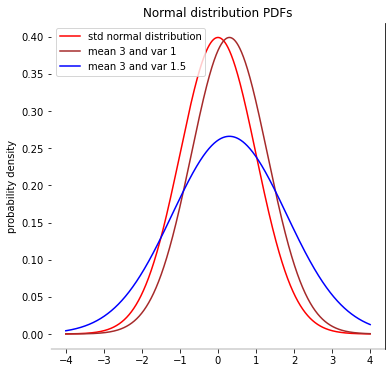

In [6]:
x_values = np.linspace(-4,4,10000)

fig, ax = plt.subplots(figsize=(6,6)) 
ax.plot(x_values,  norm_pdf(x_values, 0, 1), color = 'red', label ='std normal distribution')
ax.plot(x_values,  norm_pdf(x_values, 0.3, 1), color = 'brown', label = 'mean 3 and var 1')
ax.plot(x_values,  norm_pdf(x_values, 0.3, 1.5), color = 'blue', label = 'mean 3 and var 1.5')
ax.set_title('Normal distribution PDFs')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.3)

ax.set_ylabel('probability density',fontdict={'fontsize': 10})

plt.legend()
plt.show()


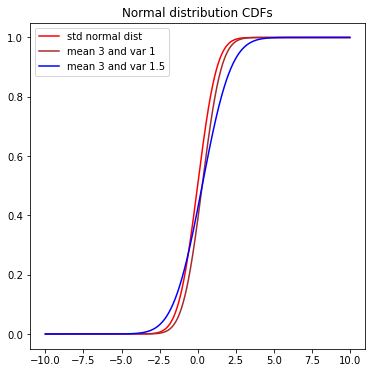

In [7]:
x_values = np.linspace(-10,10,10000)

fig, ax = plt.subplots(figsize=(6,6)) 
ax.plot(x_values,  norm_cdf(x_values, 0, 1), color = 'red', label ='std normal dist' )
ax.plot(x_values,  norm_cdf(x_values, 0.3, 1), color = 'brown', label ='mean 3 and var 1' )
ax.plot(x_values,  norm_cdf(x_values, 0.3, 1.5), color = 'blue', label ='mean 3 and var 1.5' )
ax.set_title('Normal distribution CDFs')
plt.legend()
plt.show()

In [8]:
print(f'area between -1 std deviation and +1 std deviations around mean: {norm_cdf(1, 0, 1)-norm_cdf(-1, 0, 1)}')
print(f'area between -2 std deviation and -1 std deviations around mean: {norm_cdf(-1, 0, 1)-norm_cdf(-2, 0, 1)}')

area between -1 std deviation and +1 std deviations around mean: 0.6826894921370859
area between -2 std deviation and -1 std deviations around mean: 0.13590512198327787


As expected we see about ~68% of probability between -1 to +1 std deviations around mean

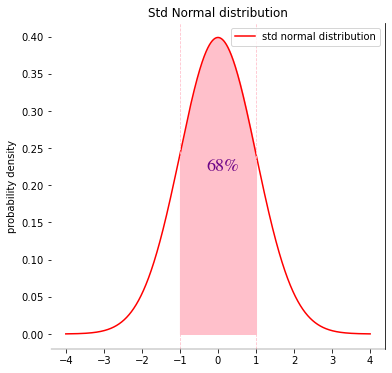

In [9]:
x_values = np.linspace(-4,4,10000)

fig, ax = plt.subplots(figsize=(6,6)) 
ax.plot(x_values,  norm_pdf(x_values, 0, 1), color = 'red', label ='std normal distribution')
ax.set_title('Std Normal distribution')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.3)

ax.set_ylabel('probability density',fontdict={'fontsize': 10})
ax.axvline(1, c='pink', lw=.8, ls = '--')
ax.axvline(-1, c='pink', lw=.8, ls = '--')

plt.fill_between(np.linspace(-1,1,10000), norm_pdf(np.linspace(-1,1,10000), 0, 1), color='pink')
ax.annotate('68%', 
             (-0.3, 0.22),
             c='#6d0487',
             size=18, weight='bold',fontname="Times") 

plt.legend()
plt.show()

##### T distribution

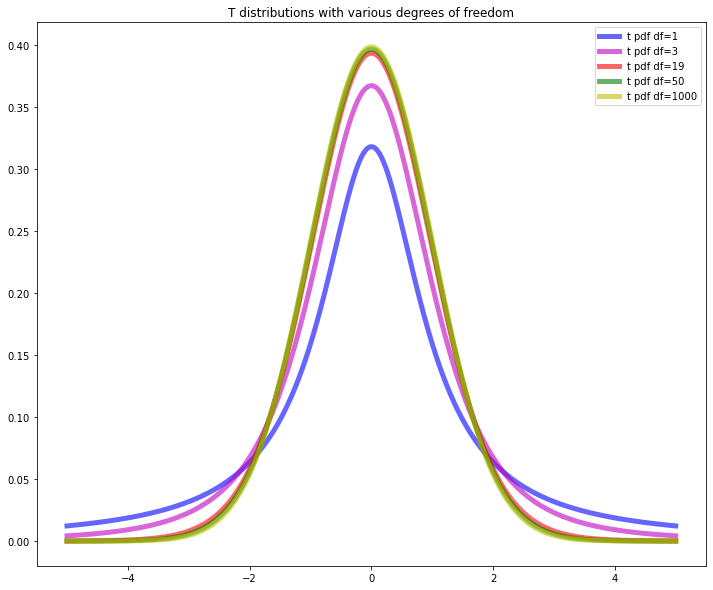

In [10]:
x_values = np.linspace(-5,5,5000)

fig, ax = plt.subplots(figsize=(12,10)) 

ax.plot(x_values, sp.t.pdf(x_values, 1),
       'b-', lw=5, alpha=0.6, label='t pdf df=1')

ax.plot(x_values, sp.t.pdf(x_values, 3),
       'm-', lw=5, alpha=0.6, label='t pdf df=3')

ax.plot(x_values, sp.t.pdf(x_values, 19),
       'r-', lw=5, alpha=0.6, label='t pdf df=19')

ax.plot(x_values, sp.t.pdf(x_values, 50),
       'g-', lw=5, alpha=0.6, label='t pdf df=50')

ax.plot(x_values, sp.t.pdf(x_values, 1000),
       'y-', lw=5, alpha=0.6, label='t pdf df=1000')

ax.set_title('T distributions with various degrees of freedom')
plt.legend()
plt.show()

As degrees of freedom, notice how closely t resembles normal distribution

Same can be seen through below pdf values are 100 and 1000 df and comparing with std normal pdf values

In [11]:
sp.t.pdf(1, 100), sp.norm.pdf(1, 0,1)

(0.24076589692855324, 0.24197072451914337)

In [12]:
sp.t.pdf(1, 1000), sp.norm.pdf(1, 0,1)

(0.24184978955225986, 0.24197072451914337)

Just for validation, checking the scipy output against manual written pdf function (Based of t distribution pdf formula)

In [13]:
def t_pdf_manual(x,df):
    return (gamma((df+1)/2)/gamma(df/2)/np.sqrt(df*math.pi))\
        *((1+((x**2)/df))**((-df-1)/2))

In [14]:
t_pdf_manual(1,100)

0.2407658969285458

#### Chi Square distribution

- Used in hypothesis testing
- Used in ANOVA and regression analysis
- Used in goodness of fit test and independence test, contingency table test
- Chi square distribution is a special case of gamma distribution


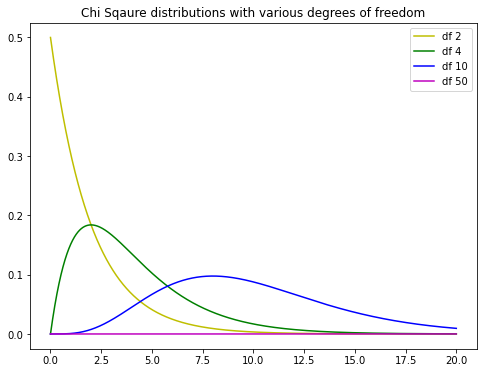

In [15]:
x_values = np.arange(0, 20, 0.001)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(x_values,  sp.chi2.pdf(x_values, df = 2), color = 'y', label = 'df 2')
ax.plot(x_values,  sp.chi2.pdf(x_values, df = 4), color = 'g', label = 'df 4')
ax.plot(x_values,  sp.chi2.pdf(x_values, df = 10), color = 'b', label = 'df 10')
ax.plot(x_values,  sp.chi2.pdf(x_values, df = 50), color = 'm', label = 'df 50')
ax.set_title('Chi Sqaure distributions with various degrees of freedom')
plt.legend()
plt.show()

In [77]:
def chisq_manual(x,df):
    return np.exp(-0.5*x)*(x**(df/2-1))*(0.5**(df/2))*(1/gamma(df/2))

For validation, checking through manualy written function (based on chisq pdf formula) too

In [79]:
chisq_manual(1,100),sp.chi2.pdf(1, df = 100)

(8.856214112161876e-79, 8.856214112161976e-79)

### Logit

- Used in logistic regression
- Used in neural networks

In [80]:
def logistic_pdf(x):
    return np.exp(-x)/((1+np.exp(-x))**2) # same as sp.logistic.pdf(x)

def logistic_cdf(x):
    return np.exp(x)/((1+np.exp(x))) # same as sp.logistic.cdf(x)

def logistic_inv_cdf(x):
    return np.log(x/(1-x)) # same as sp.logistic.ppf(x)

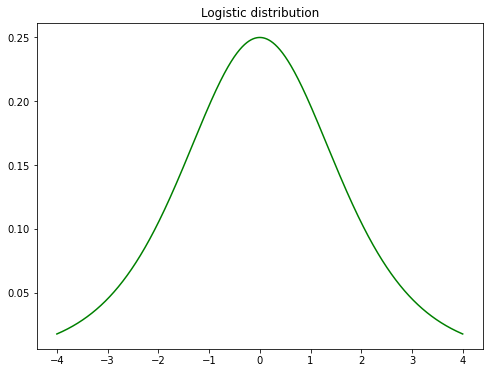

In [84]:
x_values = np.linspace(-4,4,10000)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(x_values,  logistic_pdf(x_values), color = 'green')
ax.set_title('Logistic distribution')
plt.show()

Notice how logistic PDF isn't far away from Normal distribution

This one of major reasons why logits is useful for classification through logistic regression. We cant use linear regression in classification case as error aint normally distributed and hence look upto logistic.

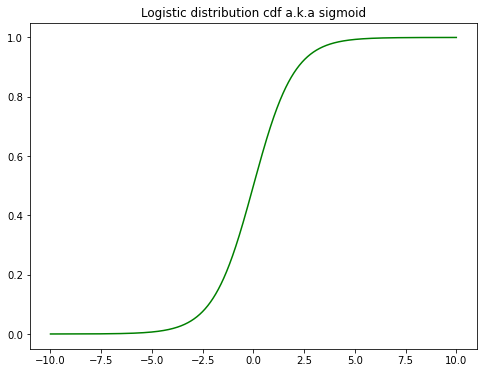

In [87]:
x_values = np.linspace(-10,10,10000)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(x_values,  logistic_cdf(x_values), color = 'green')
ax.set_title('Logistic distribution cdf a.k.a sigmoid')
plt.show()

Notice how outputs are between 0 to 1. This is inline with probabilities range for a classification problem.

/var/folders/5j/d7czpqyn59730dnppn2p0jj00000gn/T/ipykernel_6870/11761888.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.log(x/(1-x)) # same as sp.logistic.ppf(x)
/var/folders/5j/d7czpqyn59730dnppn2p0jj00000gn/T/ipykernel_6870/11761888.py:8: RuntimeWarning: divide by zero encountered in log
  return np.log(x/(1-x)) # same as sp.logistic.ppf(x)


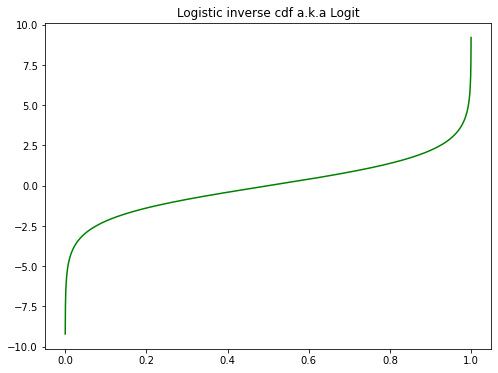

In [88]:
x_values = np.linspace(0,1,10000)

fig, ax = plt.subplots(figsize=(8,6)) 
ax.plot(x_values,  logistic_inv_cdf(x_values), color = 'green')
ax.set_title('Logistic inverse cdf a.k.a Logit')
plt.show()